In [54]:
%matplotlib inline
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np


In [2]:
start_date = '2020-01-01'
end_date = '2021-01-26'

In [20]:
sp500 = pdr.DataReader('SPY', 'yahoo', start_date, end_date)
game_stop = pdr.DataReader('GME', 'yahoo', start_date, end_date)
apple = pdr.DataReader('AAPL', 'yahoo', start_date, end_date)


In [4]:
sp500.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-20,384.790009,380.690002,381.109985,383.890015,61836100.0,383.890015
2021-01-21,384.950012,383.250000,384.489990,384.239990,47955800.0,384.239990
2021-01-22,384.130005,381.839996,382.250000,382.880005,52860500.0,382.880005
2021-01-25,384.769989,378.459991,383.670013,384.390015,70402000.0,384.390015
2021-01-26,385.850006,383.540009,385.410004,383.790009,42328700.0,383.790009


In [5]:
game_stop.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-20,41.189999,36.060001,37.369999,39.119999,33471800,39.119999
2021-01-21,44.750000,37.000000,39.230000,43.029999,57079800,43.029999
2021-01-22,76.760002,42.320000,42.590000,65.010002,196784300,65.010002
2021-01-25,159.179993,61.130001,96.730003,76.790001,177874000,76.790001
2021-01-26,150.000000,80.199997,88.559998,147.979996,176532400,147.979996


In [21]:
apple.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-20,132.490005,128.550003,128.660004,132.029999,104319500.0,132.029999
2021-01-21,139.669998,133.589996,133.800003,136.869995,120529500.0,136.869995
2021-01-22,139.850006,135.020004,136.279999,139.070007,113907200.0,139.070007
2021-01-25,145.089996,136.539993,143.070007,142.919998,157611700.0,142.919998
2021-01-26,144.300003,141.369995,143.600006,143.160004,97615900.0,143.160004


In [70]:
game_stop['Close'][268]/game_stop['Close'][0]

23.451663560927738

Text(0.5, 1.0, 'percentual comparison')

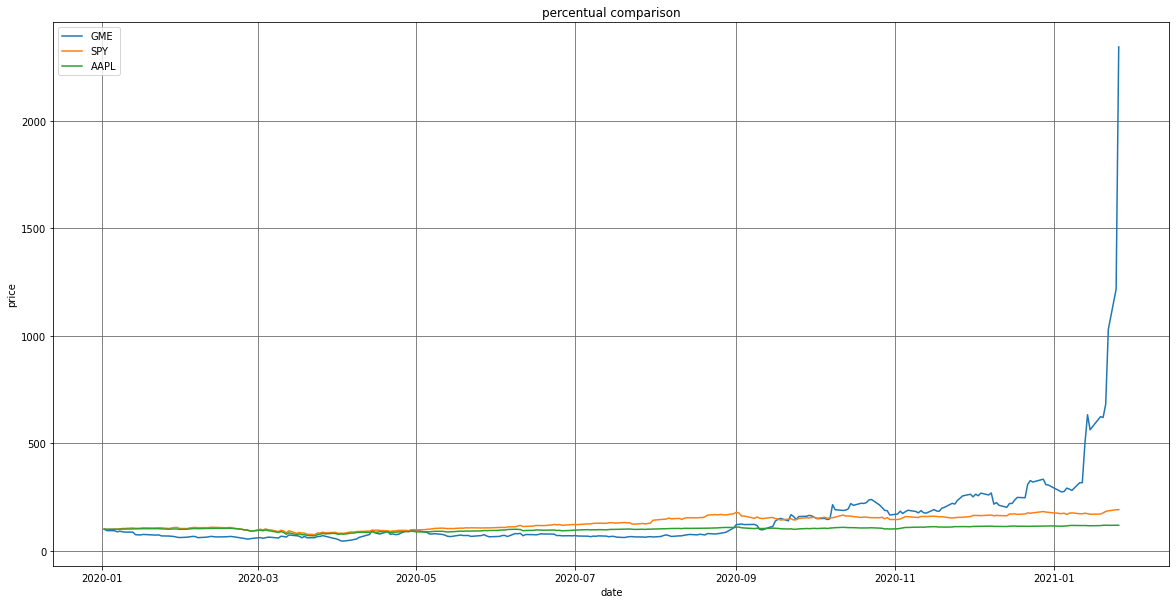

In [71]:
plt.figure(figsize=(20,10))
plt.plot(game_stop['Close'].div(game_stop['Close'][0]).mul(100), label='GME')
plt.plot(apple['Close'].div(apple['Close'][0]).mul(100), label="SPY")
plt.plot(sp500['Close'].div(sp500['Close'][0]).mul(100), label='AAPL')
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.xlabel('date')
plt.ylabel('price')
plt.legend()
plt.title('percentual comparison')


Text(0.5, 1.0, 'daily return Apple vs Game stop')

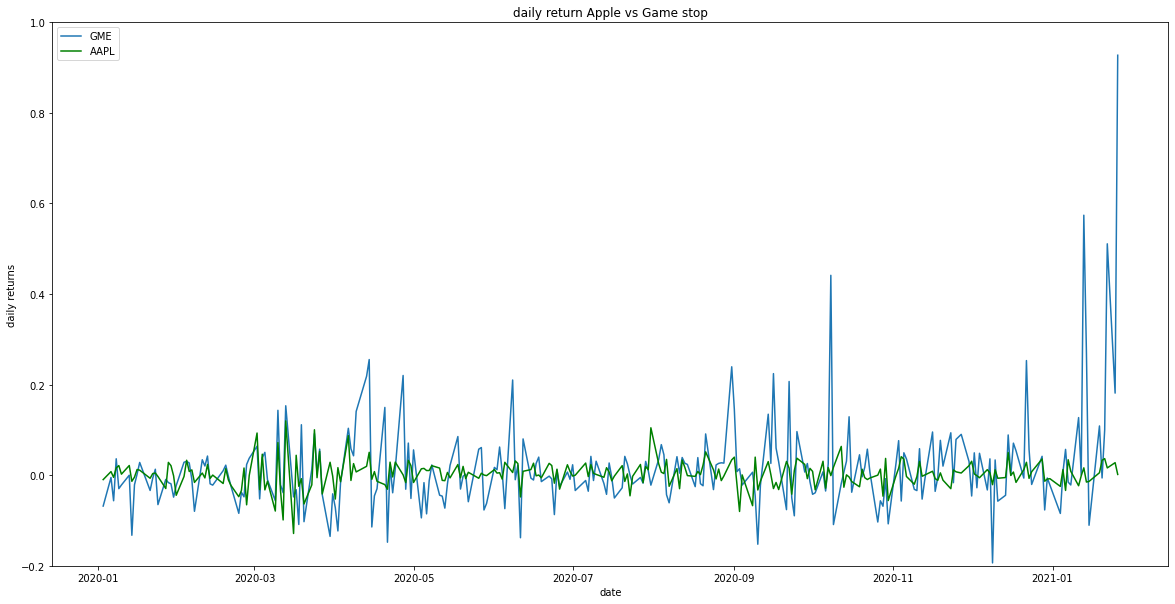

In [32]:
plt.figure(figsize=(20,10))
game_stop_returns = game_stop['Close'].pct_change()
apple_returns = apple['Close'].pct_change()
plt.plot(game_stop_returns, label='GME')
plt.plot(apple_returns, label='AAPL', color='g')
plt.xlabel('date')
plt.ylabel('daily returns')
plt.legend()
plt.ylim(top=1)
plt.ylim(bottom= -0.2)
plt.title('daily return Apple vs Game stop')



Text(0.5, 1.0, 'daily returns S&P 500')

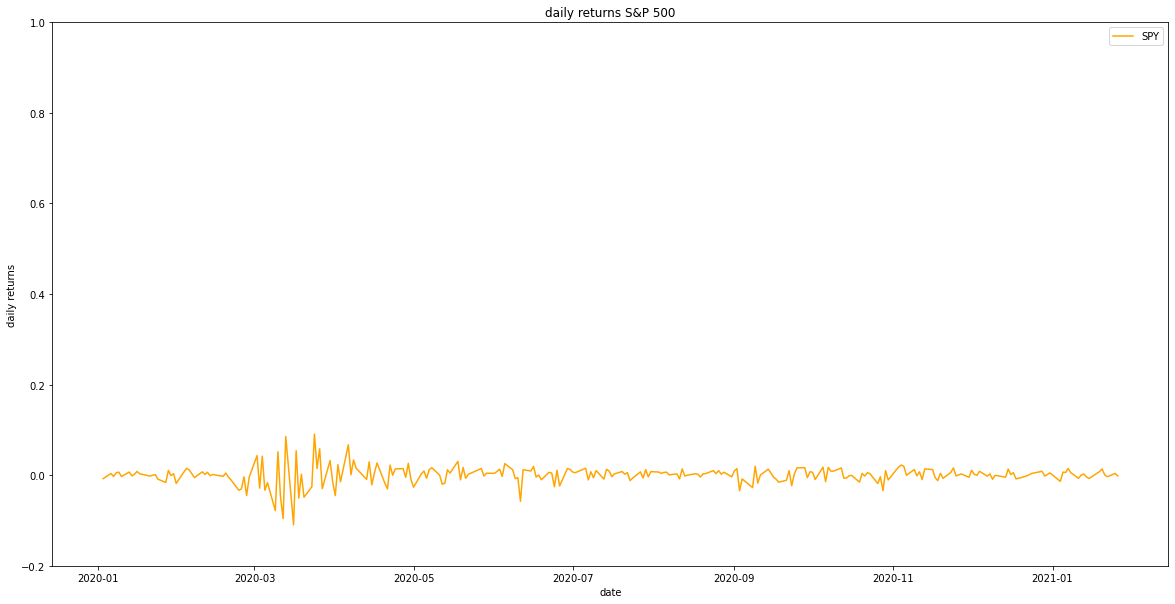

In [31]:
plt.figure(figsize=(20,10))
spy_returns = sp500['Close'].pct_change()
plt.plot(spy_returns, label='SPY', color='orange')
plt.xlabel('date')
plt.ylabel('daily returns')
plt.ylim(top=1)
plt.ylim(bottom= -0.2)
plt.legend()
plt.title('daily returns S&P 500')



In [72]:
excess_returns_game_stop = game_stop_returns.sub(spy_returns)
excess_returns_apple = apple_returns.sub(spy_returns)

excess_returns_game_stop.describe()

count    268.000000
mean       0.015509
std        0.102531
min       -0.184656
25%       -0.029867
50%       -0.000874
75%        0.036483
max        0.928635
Name: Close, dtype: float64

In [36]:
excess_returns_apple.describe()


count    268.000000
mean       0.001995
std        0.016826
min       -0.045647
25%       -0.007821
50%        0.000894
75%        0.010896
max        0.096786
Name: Close, dtype: float64

([<matplotlib.axis.XTick at 0x7fc5446e3970>,
 [Text(1, 0, 'AAPL'), Text(2, 0, 'GME')])

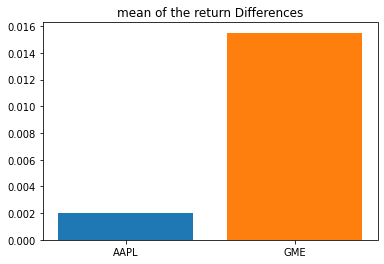

In [45]:
avg_excess_return_game_stop = excess_returns_game_stop.mean()
avg_excess_return_apple = excess_returns_apple.mean()

lables = ['AAPL', 'GME']

plt.bar(1, avg_excess_return_apple)
plt.bar(2, avg_excess_return_game_stop)
plt.title('mean of the return Differences')
plt.xticks([1,2],lables)

([<matplotlib.axis.XTick at 0x7fc5447bc6d0>,
 [Text(1, 0, 'AAPL'), Text(2, 0, 'GME')])

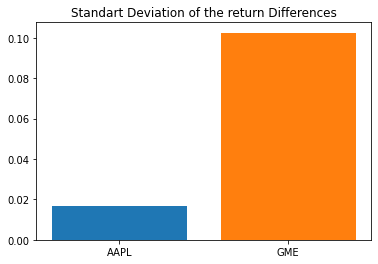

In [48]:
std_excess_return_game_stop = excess_returns_game_stop.std()
std_excess_return_apple = excess_returns_apple.std()

plt.bar(1, std_excess_return_apple)
plt.bar(2, std_excess_return_game_stop)
plt.title('Standart Deviation of the return Differences')
plt.xticks([1,2],lables)

([<matplotlib.axis.XTick at 0x7fc54475bee0>,
 [Text(1, 0, 'AAPL'), Text(2, 0, 'GME')])

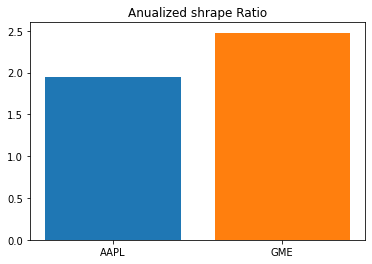

In [55]:
daily_sharpe_ratio_apple = avg_excess_return_apple / std_excess_return_apple
daily_sharpe_ratio_game_stop = avg_excess_return_game_stop / std_excess_return_game_stop

anual_apple = daily_sharpe_ratio_apple*np.sqrt(268)
anual_game_stop = daily_sharpe_ratio_game_stop*np.sqrt(268)

plt.bar(1, anual_apple)
plt.bar(2, anual_game_stop)
plt.title('Anualized shrape Ratio')
plt.xticks([1,2],lables)